# Logistic Regression as a Single Neuran of a Neural Network

Welcome to your first programming assignment! You will build a logistic regression classifier to recognize  cats. This assignment will step you through how to do this with a Neural Network mindset where logistic regression represents a single nueron. 

**Instructions:**
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.

**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

## 1 -  Loading Packages ##
First, let's run the cell below to import all the packages that you will need during this assignment. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import glob
from sklearn.model_selection import train_test_split

%matplotlib inline

## 2 - Utility functions to convert images into datasets ##
The following functions are used to convert the cats and dogs images in the dataset folder into the numpy array format with labels. 

In [2]:
def convert_image_to_data(image, WIDTH, HEIGHT):
    image_resized = Image.open(image).resize((WIDTH, HEIGHT))
    image_array = np.array(image_resized).T
    return image_array

In [3]:
# def create_train_test_data(num_pix,test_size=0.2):
#     cat_files = glob.glob("datasets/cat*")
#     dog_files = glob.glob("datasets/dog*")

#     # Restrict cat and dog files here for testing
#     cat_list = [convert_image_to_data(i, num_pix, num_pix) for i in cat_files]
#     dog_list = [convert_image_to_data(i, num_pix, num_pix) for i in dog_files]

#     y_cat = np.zeros(len(cat_list))
#     y_dog = np.ones(len(dog_list))

#     X = np.concatenate([cat_list, dog_list])
#     X = np.concatenate([cat_list, dog_list])
#     y = np.concatenate([y_cat, y_dog])

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
#     return X_train, X_test, y_train, y_test


def load_dataset(database_path):
    
    dataset_db = h5py.File(database_path, "r")
    
    datasets = {}
    for dataset in ["train", "dev", "test"]:
        
        datasets[dataset] = {
                             'X': np.array(dataset_db[dataset + "_img"][:]),  # dataset features
                             'Y': np.array(dataset_db[dataset + "_labels"][:]) # dataset labels
                            }
    return datasets

### 2.1 - Load data set ###
Use the utility functions provided above to load the train_set_x,train_set_y, test_set_x, test_set_y.
Set the `num_pix` to 64 and keep the `test_size` as the default value.

In [4]:
# set the num_pix to 64
 # num_pix = None

num_pix = 64

# load the train_set_x_orig, test_set_x_orig, train_set_y, test_set_y, dev_set_x and dev_set_y

datasets = load_dataset('car_dataset.hdf5')

train_set_x_orig = datasets['train']['X']
train_set_y = datasets['train']['Y']

# loading the x and y from dev_set
dev_set_x_orig = datasets['dev']['X']
dev_set_y = datasets['dev']['Y']

# loading the x and y from the training_set
test_set_x_orig = datasets['test']['X']
test_set_y = datasets['test']['Y']


#### 2.1.1 - Print the shapes ###
Print the shape of the following variables
- Number of training examples: m_train
- Number of testing examples: m_test
- Height/Width of each image: num_px
- train_set_x shape
- train_set_y shape
- test_set_x shape
- test_set_y shape

In [5]:
# your code here <begin>

#Number of Training Examples:

print('Training Data:', np.shape(train_set_x_orig)[0])
print('Testing Data:', np.shape(test_set_x_orig)[0])
print('Number of Pixels in Sqaure Image:', np.shape(train_set_x_orig)[1])

print('Dimension of train_set_x_orig: ', np.shape(train_set_x_orig))
print('Dimension of train_set_y: ', np.shape(train_set_y))
print('Dimension of dev_set_x_orig: ', np.shape(dev_set_x_orig))
print('Dimension of dev_set_y_orig: ', np.shape(dev_set_y))
print('Dimension of test_set_x_orig: ', np.shape(test_set_x_orig))
print('Dimension of test_set_y: ', np.shape(test_set_y))
#your code here <end>

Training Data: 517
Testing Data: 173
Number of Pixels in Sqaure Image: 64
Dimension of train_set_x_orig:  (517, 64, 64, 3)
Dimension of train_set_y:  (517,)
Dimension of dev_set_x_orig:  (172, 64, 64, 3)
Dimension of dev_set_y_orig:  (172,)
Dimension of test_set_x_orig:  (173, 64, 64, 3)
Dimension of test_set_y:  (173,)


#### 2.1.2 - Fixing ill-shape vectors ####
It is possible that the train_set_y and test_set_y have an ill-shape. Fix these shapes so the train_set_y and test_set_y are represented as a matrix with size (1, number of examples)

In [6]:
# your code here <begin>
train_set_y = np.reshape(train_set_y, (1, np.shape(train_set_x_orig)[0]))
test_set_y = np.reshape(test_set_y, (1, np.shape(test_set_x_orig)[0]))
dev_set_y = np.reshape(dev_set_y, (1, np.shape(dev_set_x_orig)[0]))
# your code here <end>

print ("train_set_y shape: " + str(train_set_y.shape))
print("dev_set_y shape: " + str(dev_set_y.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_y shape: (1, 517)
dev_set_y shape: (1, 172)
test_set_y shape: (1, 173)


### 2.2 - Flatten the data
Reshape the training and test data sets so that each image is flattened into single vectors of shape (num_px  ∗ num_px  ∗ 3, 1). Check the shapes for train_set_x_flatten and test_set_x_flatten.

In [7]:
# your code here

print("Before Flattening\n")
print ("train_set_x_orig shape: " + str(train_set_x_orig.shape))
print ("test_set_x_orig shape: " + str(test_set_x_orig.shape))
print ("dev_set_x_orig shape: " + str(dev_set_x_orig.shape))


print("\nAfter Flattening\n")
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
dev_set_x_flatten = dev_set_x_orig.reshape(dev_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("dev_set_x_flatten shape: " + str(dev_set_x_flatten.shape))


Before Flattening

train_set_x_orig shape: (517, 64, 64, 3)
test_set_x_orig shape: (173, 64, 64, 3)
dev_set_x_orig shape: (172, 64, 64, 3)

After Flattening

train_set_x_flatten shape: (12288, 517)
test_set_x_flatten shape: (12288, 173)
dev_set_x_flatten shape: (12288, 172)


### 2.3 - Standardize the data
Divide every row of the dataset by 255 

In [8]:
# your code here
# your code here
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255
dev_set_x = dev_set_x_flatten / 255

print(np.shape(train_set_x))
print(np.shape(test_set_x))
print(np.shape(dev_set_x))

(12288, 517)
(12288, 173)
(12288, 172)


## 3 - Implementing the Helper Functions ## 

### 3.1 - Sigmoid function
Implement `sigmoid()`. 

In [9]:
# your code here
import math

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#test
#sigmoid(0.345)

### 3.2 - Implement initialize_with_zeros
Write a function that initializes initialize w as a vector of zeros and set `b` to zero. 

In [10]:
# your code here

#Dimension of the Training Data
# print(np.shape(train_set_x_flatten_std))

def initialize_weights():
    w = np.zeros((12288,1))
    b = 0
    #b = np.zeros((1,640))
    return w,b


### 3.3 - Forward propagation

Implement forward propagation to calculate $A$ and cost.

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$


In [11]:
# your code here

#Forward Propagation 
def forward_pass(X, Y, w, b):
    
    m = np.shape(X)[1]
    
    Z = np.dot(w.transpose(),X) + b
    A = sigmoid(Z)
    # np.shape(A)
    # np.shape(Z)

    J = Y*np.log(A) + (1-Y)*np.log(1-A)
    J = -np.sum(J)/m
    return A, J

### 3.4 - Backward propagation

Implement backward propagation to compute gradients $dw$ and $db$
Here are the two formulas you will be using: 

$$ dw = \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ db = \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [12]:
# your code here
def backprop(X, Y, A):
    # X is train_set_x_flatten_std
    # Y is train_set_y
    # A is returned from forward_pass (the output activations)
    # m is number of training examples
    
    m = np.shape(X)[1]

    dZ = A - Y

    dw = (1/m)*(np.matmul(X,dZ.transpose()))

    db = (1/m)*np.sum(dZ)
    
    return dw,db

### 3.5 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. 

In [13]:
# your code here

def optimize(alpha,w,b,dw,db):
    #alpha - learning rate
    #w - current weight
    #b- current bias
    #dw - weight change to be made
    #db - bias change to be made
    
    w = w - alpha*dw
    b = b - alpha*db

    return w,b

### 3.6 - Prediction

Implement the `predict()` function. There is two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [14]:
# your code here
def predict(X, w, b):
    y_hat = sigmoid(np.dot(w.transpose(),X) + b)
    
    #Thresholding into 0 and 1 --- binary classification prediction
    for c, i in enumerate(y_hat[0]):
        if i > 0.5:
            y_hat[0][c] = 1
        else:
            y_hat[0][c] = 0
            
    return y_hat

## 4 - Regression Model ##
Implement the model function. Use the following notation:
    - Y_prediction for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [15]:
# your code here

#Regression Model 
def model(num_iter, alpha, X_train, Y_train, X_test, Y_test,X_dev,Y_dev):
    
    #Initialize the weights/bias ---w is the weight vector, b is the bias value
    w,b = initialize_weights()
    
    #Number of Training Examples:
    m = np.shape(X_train)[1]
    
    #Cost Function with respect to number of iterations
    #Store that Data
    
    Cost_Data = []
    Weight_Gradient = []
    Bias_Gradient = []
    
    for i in range(0,num_iter):
            
        #Run the forward pass----  A is the activations, J is the cost
        A,J = forward_pass(X_train, Y_train, w,b)
        
        Cost_Data.append(J)
        
        if i%100 == 0:
            print('Iteration {} Cost {}'.format(i, J))
            
            

        #Error Backpropagation --- dw is the weight change, db is the bias change
        dw,db = backprop(X_train, Y_train, A)

        Weight_Gradient.append(dw)
        Bias_Gradient.append(db)
        
        #Optimize --- w,b are the new weights, bias values
        w,b = optimize(alpha,w,b,dw,db) 
       
    
    
    
    # For train and test accuracy
    Y_prediction = predict(X_test, w, b)
    
    Y_prediction_train = predict(X_train, w, b)
    
    Y_prediction_dev = predict(X_dev,w,b)
    
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction - Y_test)) * 100))
    print("validation accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_dev - Y_dev)) * 100))
        
    
    return Cost_Data, w,b, Weight_Gradient,Bias_Gradient

    

## 5. Run the regression model function to train your model.
### 5.1 - Setting parameters (part 1)
Set the `num_iterations` to 5000 and `learning_rate` to 0.0005

In [16]:
# your code here

Cost_Data,w ,b,Weight_Gradient,Bias_Gradient = model(5000,0.0005,train_set_x,train_set_y,test_set_x,test_set_y,dev_set_x,dev_set_y)

# model(5000,0.0005,train_set_x_flatten_std,train_set_y,test_set_x_flatten,test_set_y)

Iteration 0 Cost 0.6931471805599453
Iteration 100 Cost 0.5485087630796787
Iteration 200 Cost 0.49629693318454876
Iteration 300 Cost 0.4595362315493049
Iteration 400 Cost 0.43224438707580903
Iteration 500 Cost 0.41106581283396
Iteration 600 Cost 0.394034121790612
Iteration 700 Cost 0.3799397768476531
Iteration 800 Cost 0.3680040700183103
Iteration 900 Cost 0.35770483853842067
Iteration 1000 Cost 0.34867924252155647
Iteration 1100 Cost 0.3406672108354305
Iteration 1200 Cost 0.33347723988088523
Iteration 1300 Cost 0.3269649672995875
Iteration 1400 Cost 0.321019315074798
Iteration 1500 Cost 0.31555326781922244
Iteration 1600 Cost 0.31049757565122726
Iteration 1700 Cost 0.3057963531574119
Iteration 1800 Cost 0.30140393837520163
Iteration 1900 Cost 0.29728260816060365
Iteration 2000 Cost 0.29340088768621786
Iteration 2100 Cost 0.2897322799413797
Iteration 2200 Cost 0.28625429729069635
Iteration 2300 Cost 0.28294771372033956
Iteration 2400 Cost 0.2797959806718442
Iteration 2500 Cost 0.2767847

**Expected Output**: 

<table style="width:40%"> 
    
    <tr>
        <td> **Train Accuracy**  </td> 
        <td> 91.25 % </td>
    </tr>

    <tr>
        <td>**Test Accuracy** </td> 
        <td> 60.0 % </td>
    </tr>
</table> 




Let's also plot the cost function and the gradients.

Text(0.5, 1.0, 'Cost vs No. of Iterations')

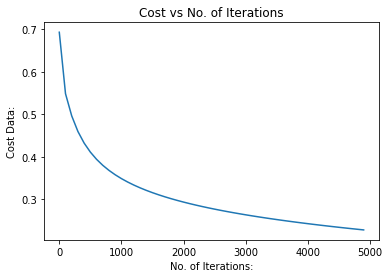

In [17]:
# Plot learning curve (with costs) for part 1

# Plot learning curve (with costs) for part 2
x_axis = [i for i in range(0,5000) if i%100 ==0]
y_axis = [Cost_Data[i] for i in range(0, 5000) if i%100 ==0]
plt.plot(x_axis, y_axis)
plt.xlabel('No. of Iterations:')
plt.ylabel('Cost Data:')
plt.title('Cost vs No. of Iterations')

### 5.1 - Setting parameters (part 2)
Set the `num_iterations` to 2000 and `learning_rate` to 0.005 and run the model again. Plot the cost function.

In [18]:
# your code here

Cost_Data1,w1 ,b1,Weight_Gradient1,Bias_Gradient1 = model(2000,0.005,train_set_x,train_set_y,test_set_x,test_set_y,dev_set_x,dev_set_y)


Iteration 0 Cost 0.6931471805599453
Iteration 100 Cost 0.34832503598373044
Iteration 200 Cost 0.29323468328455565
Iteration 300 Cost 0.2633464913452111
Iteration 400 Cost 0.24253059943103009
Iteration 500 Cost 0.22635286068300065
Iteration 600 Cost 0.21301379372361937
Iteration 700 Cost 0.20161395404816623
Iteration 800 Cost 0.1916401352231467
Iteration 900 Cost 0.1827710242724725
Iteration 1000 Cost 0.1747909067232438
Iteration 1100 Cost 0.1675467811287168
Iteration 1200 Cost 0.16092519587059356
Iteration 1300 Cost 0.15483890800007094
Iteration 1400 Cost 0.14921879443083969
Iteration 1500 Cost 0.14400873568826805
Iteration 1600 Cost 0.13916226075501759
Iteration 1700 Cost 0.13464027463236447
Iteration 1800 Cost 0.13040947191888988
Iteration 1900 Cost 0.1264411962537478
train accuracy: 97.48549323017409 %
test accuracy: 89.59537572254335 %
validation accuracy: 91.86046511627907 %


Text(0.5, 1.0, 'Cost vs No. of Iterations')

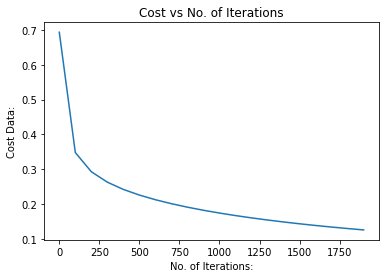

In [19]:
# Plot learning curve (with costs) for part 2
x_axis = [i for i in range(0,2000) if i%100 ==0]
y_axis = [Cost_Data1[i] for i in range(0,2000) if i%100 ==0]
plt.plot(x_axis, y_axis)
plt.xlabel('No. of Iterations:')
plt.ylabel('Cost Data:')
plt.title('Cost vs No. of Iterations')

### 5.3 - Analysis
Compare the cost function plots of part_1 and part_2. Write your observation below.

#### Write Your observation here
......

In [20]:


# ##----------------------------Part 1 --------------------------------------
# Learning Rate: 0.0005
# Number of Epochs: 5000

# train accuracy: 92.06963249516441 %
# test accuracy: 87.28323699421965 %
# validation accuracy: 92.44186046511628 %
    
# Result: Smooth Cost Function Observed, as the number of iterations increases, the cost is converging towards 
# a minima. 

# ##---------------------------Part 2----------------------------------------
# Learning Rate: 0.005 (10x Increase!)
# Number of Epochs: 2000 (60% Decrease in Epoch Time)

# train accuracy: 97.48549323017409 %
# test accuracy: 89.59537572254335 %
# validation accuracy: 91.86046511627907 %

    
# Result: Cost function shows steep decrease at first, then slowly converges down towards a minima. 
    
# Summary: As we can observe, a smaller learning rate gives a smoother loss function, with weight updates having lesser
# magnitude, but might take more time to converge. However, if the learning rate is increased over a specific amount, 
# it shows undesirable divergent behavior. Therefore, an optimal learning rate between the two which maximises speed
# and stability is desired. Here, the spped is good for the first run as you can see a steep decrease in the cost for the
# first few iterations


#MANOHAR ANUMOLU UID 115733039
# #---------------------------------------------------------------------------